In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ресурсы

In [2]:
# https://seaborn.pydata.org/
# https://pyprog.pro/sns/sns_guide.html

# Конфигурирование

In [75]:
%matplotlib inline
sns.set(rc={'figure.figsize': (9, 6)})

# Загрузка данных

In [22]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance= students_performance\
                                    .rename(columns=
                                            {'parental level of education': 'parental_level_of_education',
                                            'test preparation course': 'test_preparation_course',
                                            'math score': 'math_score',
                                            'reading score': 'reading_score',
                                            'writing score': 'writing_score'})
students_performance.head(1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [33]:
genom = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
genom.head(1)

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842


In [52]:
dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)
dota.head(1)

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"


In [54]:
flowers = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
flowers.head(1)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0


# Графики

## Корреляции

### Scatterplot

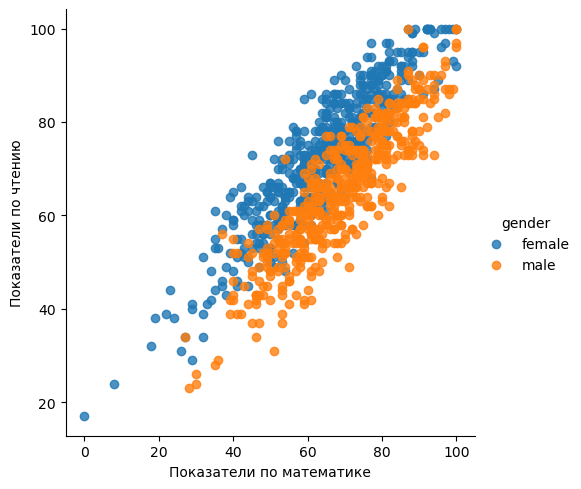

In [25]:
fig = sns.lmplot(x='math_score', y='reading_score', 
           hue = 'gender', 
           data=students_performance,
           fit_reg=False
          );
fig.set_xlabels('Показатели по математике')
fig.set_ylabels('Показатели по чтению');
# hue - группирующая переменная
# fit_reg - показать или нет регрессионную прямую

### Тепловая карта

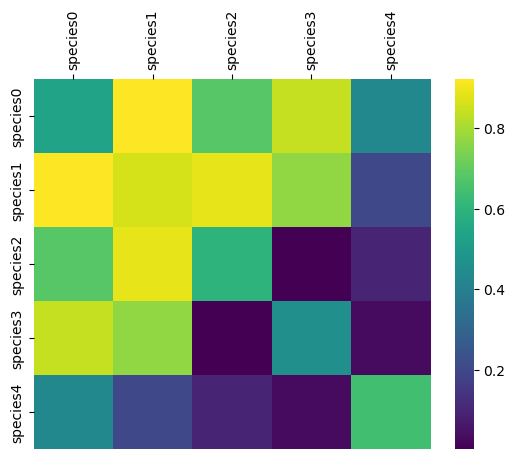

In [37]:
genom_heatmap = sns.heatmap(data=genom, cmap='viridis');
genom_heatmap.xaxis.set_ticks_position('top')
genom_heatmap.xaxis.set_tick_params(rotation=90)

## Распределения

### Гистограммы

<Axes: xlabel='role_count', ylabel='Count'>

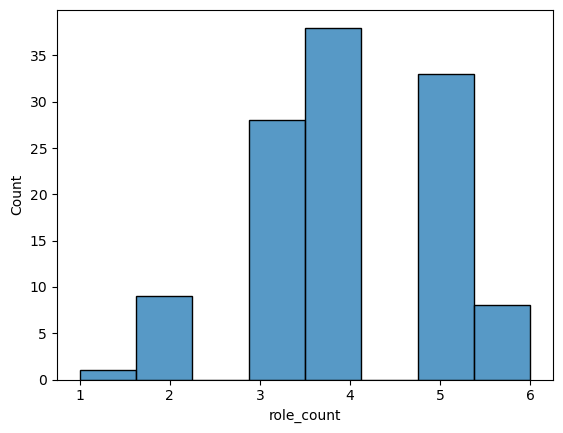

In [56]:
dota['role_count'] = dota['roles'].apply(lambda x: len(x.split(',')))
sns.histplot(data=dota['role_count'])

### Плотность распределения

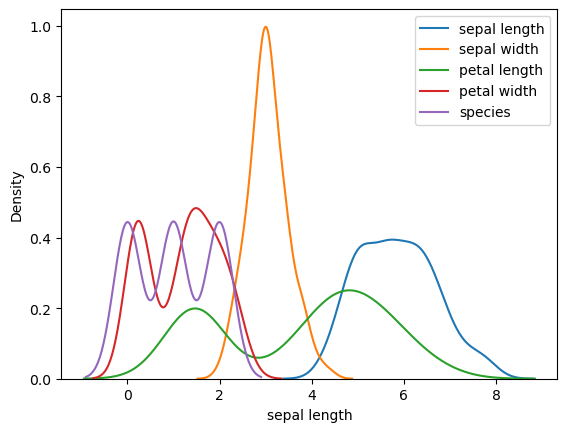

In [69]:
for column in flowers:
    fig = sns.kdeplot(data=flowers[column], legend=True, label=column)
plt.legend();

### Попарное распределение

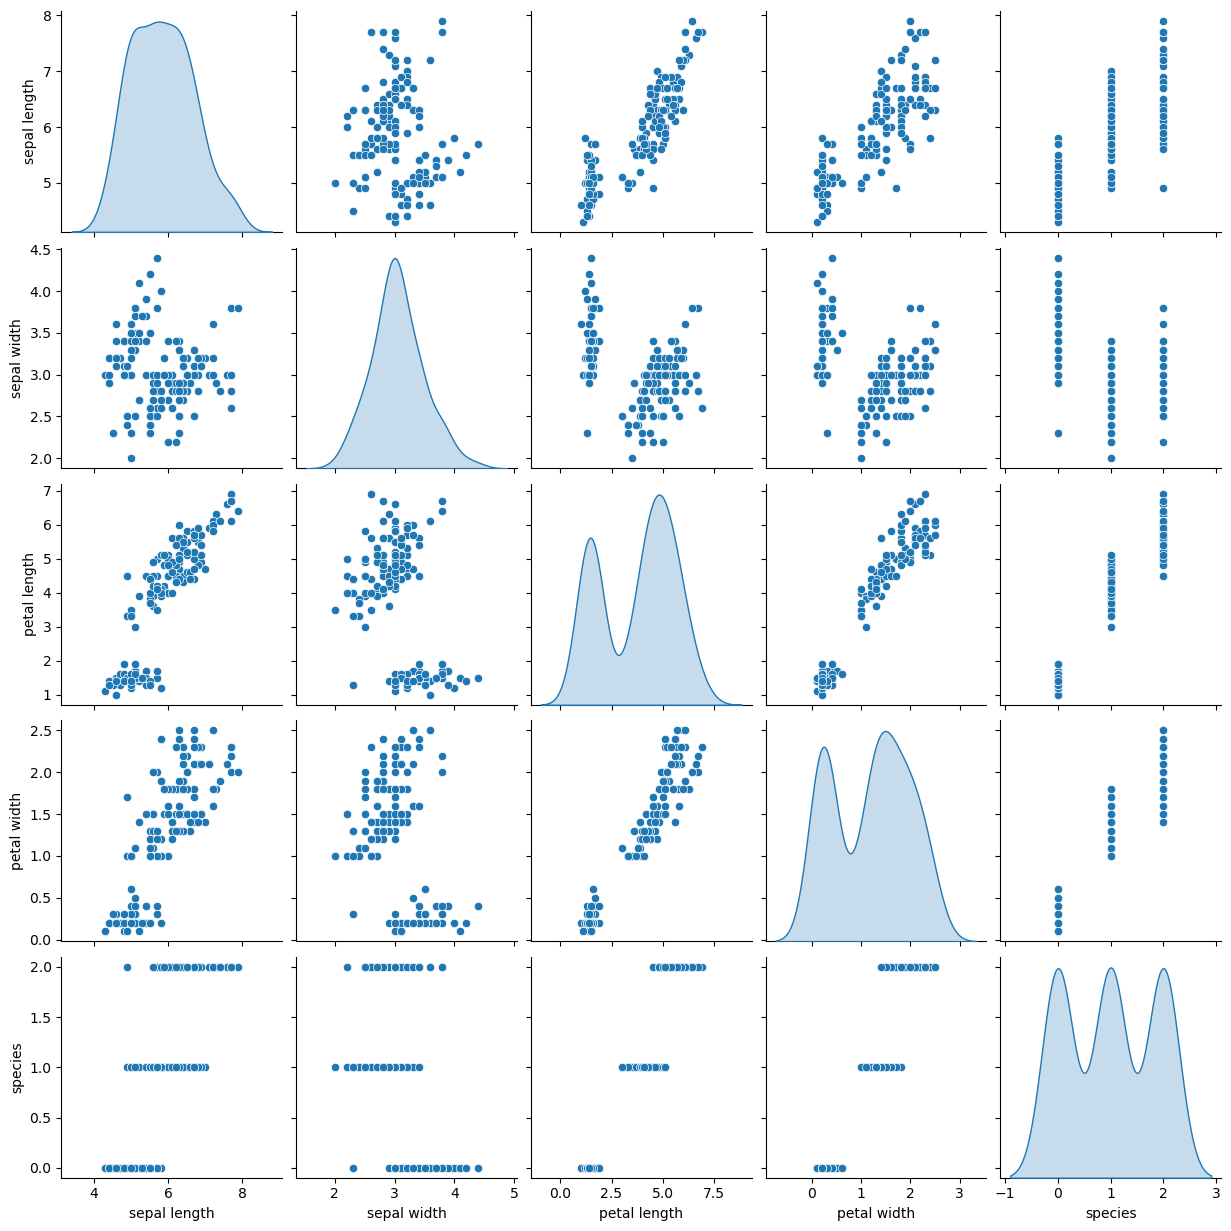

In [73]:
sns.pairplot(data=flowers, diag_kind='kde');

### Violin plot

<Axes: ylabel='petal length'>

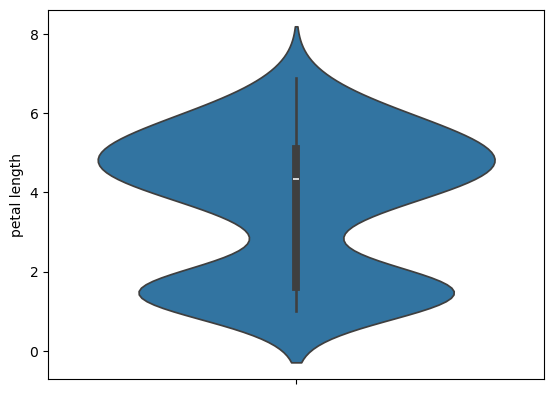

In [74]:
sns.violinplot(data=flowers['petal length'])